In [1]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/pycups-2.0.1-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/PyPDF3-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

# Импорт данных

In [3]:
df = pd.read_csv('./data/Cian data ~2700 flats long rent.csv')

In [15]:
df.columns

Index(['Unnamed: 0', 'author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price_per_month', 'commissions', 'district', 'street',
       'house_number', 'underground', 'residential_complex',
       'underground_counts', 'adress', 'lat', 'lng'],
      dtype='object')

In [4]:
df.head(3)

,Unnamed: 0,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,...,commissions,district,street,house_number,underground,residential_complex,underground_counts,adress,lat,lng
0,0,Циан х ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/301225189/,Москва,rent,flat,10,33,1,...,0,Головинский,Кронштадтский бульвар,8к1,Водный стадион,NaN,21,"Москва, Кронштадтский бульвар, 8к1",55.84150,37.48663
1,1,Циан х ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/301681276/,Москва,rent,flat,5,19,1,...,0,Можайский,Рябиновая,3к3,Рабочий посёлок,NaN,12,"Москва, Рябиновая , 3к3",55.71792,37.42460
2,2,ЕГСН Аренда,real_estate_agent,https://www.cian.ru/rent/flat/301029990/,Москва,rent,flat,1,12,1,...,0,Пресненский,Трехгорный Вал,1,Улица 1905 года,NaN,12,"Москва, Трехгорный Вал, 1",55.75721,37.55976


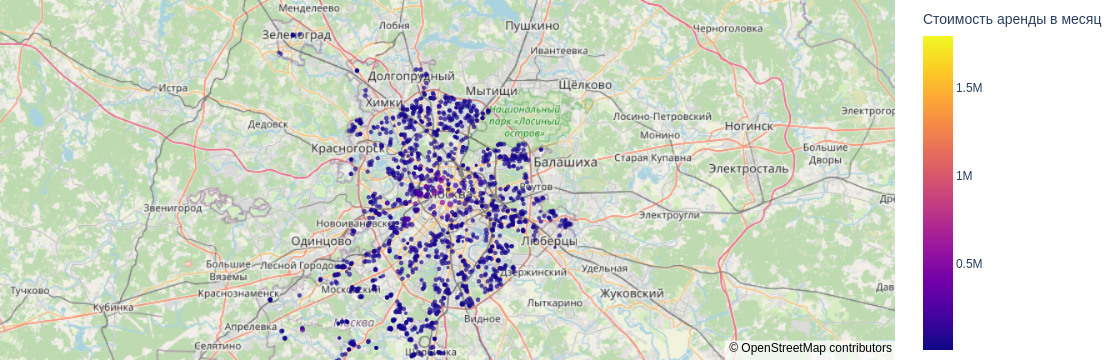

In [37]:
fig = go.Figure(go.Scattermapbox(
    lat = df.lat,
    lon = df.lng,
    text = 'Адресс: ' + df.adress + '\tЦена: ' + df.price_per_month.astype(str),
    marker = dict(
        colorbar=dict(title="Стоимость аренды в месяц"),
        size = df.total_meters.apply(lambda x: np.log2(x)),
        color = df.price_per_month
    )
))

map_center = go.layout.mapbox.Center(lat = 55.77137, lon = 37.61324)

fig.update_layout(
    margin = dict(l = 0, r = 0, t = 0, b = 0),
    mapbox_style = "open-street-map",
    mapbox = dict(center=map_center, zoom=8)
)

fig.show()